# Parallel computing concepts

This notebook accompanies the Parallel Computing Concepts talk that is offered by SDSC and delivered through XSEDE, SDSC's HPC training series and other venues. It currently contains code for presenting scaling data - the right way and the wrong way - and illustrating the limits on scalability imposed by Amdahl's Law. This is a work in progress and new content will be added as necessary.

## Presenting scaling data

In this section, we generate and display scaling data for two hypothetical codes: one which achieves perfect scaling and another that has realistic/imperfect scaling. The main takeaway is that naively plotting run time vs. core count using linear axes is to be avoided since it does not provide accurate insight into performance, particularly at higher core counts.

In [1]:
%matplotlib inline
import matplotlib as mpl
mpl.get_backend()

import matplotlib.pyplot as plt
import numpy as np

In [2]:
perfect_strong_cores = np.array([1, 2, 4, 8, 16, 32, 64, 128])
perfect_strong_time = 10000.0 / perfect_strong_cores
perfect_strong_speedup = perfect_strong_time[0] / perfect_strong_time
perfect_strong_eff = perfect_strong_speedup / perfect_strong_cores

In [3]:
imperfect_strong_cores = np.array([1, 2, 4, 8, 16, 32, 64, 128])
imperfect_strong_time = 10000.0 * np.array([ 1.0, 1.05, 1.05, 1.07, 1.2, 1.5, 2.3, 4.0]) / imperfect_strong_cores
imperfect_strong_speedup = imperfect_strong_time[0] / imperfect_strong_time
imperfect_strong_eff = imperfect_strong_speedup / imperfect_strong_cores

### Displaying strong scaling for a perfectly scalable code using linear axes

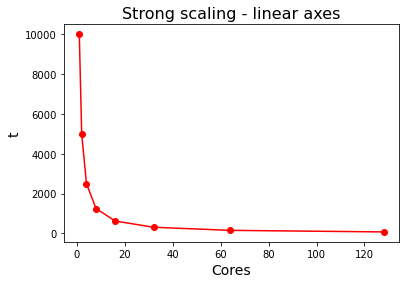

In [4]:
f, ax = plt.subplots()
ax.set_xlabel('Cores', fontsize=14)
ax.set_ylabel('t', fontsize=14)
ax.set_title('Strong scaling - linear axes', fontsize=16)
ax.plot(perfect_strong_cores, perfect_strong_time, 'ro-')

plt.savefig("strong1_lin.png", dpi=300)
plt.show()

### Displaying strong scaling for a realistic / imperfectly scalable code using linear axes

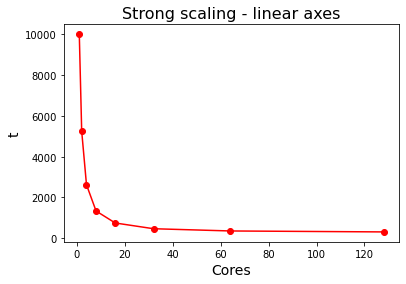

In [5]:
f, ax = plt.subplots()
ax.set_xlabel('Cores', fontsize=14)
ax.set_ylabel('t', fontsize=14)
ax.set_title('Strong scaling - linear axes', fontsize=16)
ax.plot(imperfect_strong_cores, imperfect_strong_time, 'ro-')

plt.savefig("strong2_lin.png", dpi=300)
plt.show()

### Displaying strong scaling for a perfectly scalable code using log axes

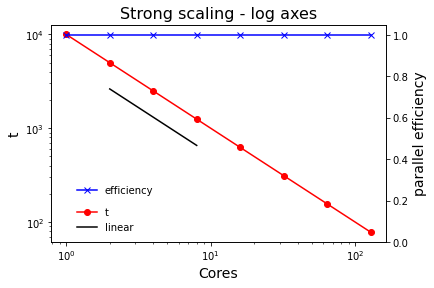

In [6]:
f, ax = plt.subplots()

x1 = imperfect_strong_cores[1]
x2 = imperfect_strong_cores[3]
y1 = imperfect_strong_time[1] * 0.5
y2 = y1 * (x1/x2)
x = [x1, x2]
y = [y1, y2]

ax.set_xlabel('Cores', fontsize=14)
ax.set_ylabel('t', fontsize=14)
ax.set_title('Strong scaling - log axes', fontsize=16)
ax.set_xscale('log')
ax.set_yscale('log')
ax.plot(perfect_strong_cores, perfect_strong_time, 'ro-', label='t')
ax.plot(x, y, 'k', label='linear')

ax2 = ax.twinx()
ax2.set_ylabel('parallel efficiency', fontsize=14)
ax2.set_ylim(0, 1.05)
ax2.plot(perfect_strong_cores, perfect_strong_eff, 'bx-', label='efficiency')

ax.legend(loc='upper left', bbox_to_anchor=(0.05, 0.1, 0.1, 0.1), frameon=False)
ax2.legend(loc='upper left', bbox_to_anchor=(0.05, 0.2, 0.1, 0.1), frameon=False)

plt.savefig("strong1_log.png", dpi=300)
plt.show()

### Displaying strong scaling for a realistic / imperfectly scalable code using log axes

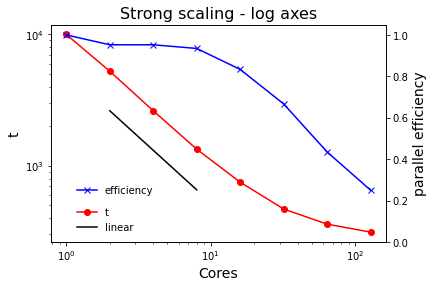

In [7]:
f, ax = plt.subplots()

x1 = imperfect_strong_cores[1]
x2 = imperfect_strong_cores[3]
y1 = imperfect_strong_time[1] * 0.5
y2 = y1 * (x1/x2)
x = [x1, x2]
y = [y1, y2]

ax.set_xlabel('Cores', fontsize=14)
ax.set_ylabel('t', fontsize=14)
ax.set_title('Strong scaling - log axes', fontsize=16)
ax.set_xscale('log')
ax.set_yscale('log')
ax.plot(imperfect_strong_cores, imperfect_strong_time, 'ro-', label='t')
ax.plot(x, y, 'k', label='linear')

ax2 = ax.twinx()
ax2.set_ylabel('parallel efficiency', fontsize=14)
ax2.set_ylim(0, 1.05)
ax2.plot(imperfect_strong_cores, imperfect_strong_eff, 'bx-', label='efficiency')

ax.legend(loc='upper left', bbox_to_anchor=(0.05, 0.1, 0.1, 0.1), frameon=False)
ax2.legend(loc='upper left', bbox_to_anchor=(0.05, 0.2, 0.1, 0.1), frameon=False)

plt.savefig("strong2_log.png", dpi=300)
plt.show()

## Amdahl's law

In this section, we illustrate Amdahl's law, which provides a hard upper limit on the speedup of a code based on the serial content. 

P = Fraction of code that can be parallelized  
S = Fraction of code that must be run sequentially (S = 1 - P)  
N = Number of processors 

$speedup(N) = \frac{1}{(1-P) + P/N}$

In [8]:
cores = [1, 2, 4, 8, 16, 32, 64, 128, 256, 512, 1024, 2048, 4096, 8192, 16384]
speedup_50 = [1/((1-0.50) + 0.50/x) for x in cores]
speedup_75 = [1/((1-0.75) + 0.75/x) for x in cores]
speedup_90 = [1/((1-0.90) + 0.90/x) for x in cores]
speedup_95 = [1/((1-0.95) + 0.95/x) for x in cores]
speedup_99 = [1/((1-0.99) + 0.99/x) for x in cores]

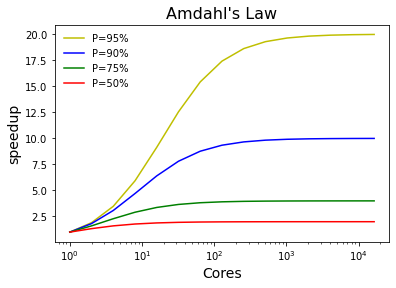

In [9]:
f, ax = plt.subplots()
ax.set_xlabel('Cores', fontsize=14)
ax.set_ylabel('speedup', fontsize=14)
ax.set_title('Amdahl\'s Law', fontsize=16)
ax.set_xscale('log')
ax.plot(cores, speedup_95, 'y-', label='P=95%')
ax.plot(cores, speedup_90, 'b-', label='P=90%')
ax.plot(cores, speedup_75, 'g-', label='P=75%')
ax.plot(cores, speedup_50, 'r-', label='P=50%')
ax.legend(loc='upper left', frameon=False)

plt.savefig("amdahl1.png", dpi=300)
plt.show()

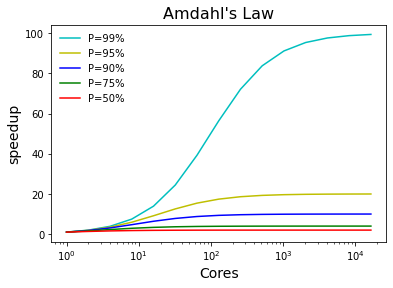

In [10]:
f, ax = plt.subplots()
ax.set_xlabel('Cores', fontsize=14)
ax.set_ylabel('speedup', fontsize=14)
ax.set_title('Amdahl\'s Law', fontsize=16)
ax.set_xscale('log')
ax.plot(cores, speedup_99, 'c-', label='P=99%')
ax.plot(cores, speedup_95, 'y-', label='P=95%')
ax.plot(cores, speedup_90, 'b-', label='P=90%')
ax.plot(cores, speedup_75, 'g-', label='P=75%')
ax.plot(cores, speedup_50, 'r-', label='P=50%')
ax.legend(loc='upper left', frameon=False)

plt.savefig("amdahl2.png", dpi=300)
plt.show()